In [3]:
from google.colab import files
uploaded = files.upload()

Saving clust_data.csv to clust_data.csv
Saving electronics_rating.csv to electronics_rating.csv


In [5]:
import pandas as pd
clust_df = pd.read_csv('clust_data.csv')
elect_df = pd.read_csv('electronics_rating.csv')
clust_df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,target
0,-3.026950,78.111415,-374.114333,70.234478,47.055428,-132.530866,-650.397369,209.966341,9.216498,152.958095,...,-116.980754,21.669078,31.152334,-70.343341,48.442535,7.248523,-56.082621,209.013176,-134.510804,2
1,10.666065,38.688616,0.982882,-90.163689,-209.167839,-15.156554,-64.164883,157.497306,-147.046024,443.664845,...,-214.024783,-25.270747,-37.412225,-40.705016,137.410740,10.278976,55.812041,176.724972,-99.276276,3
2,12.889724,6.537806,-7.172982,13.354590,-104.688780,14.148796,-47.564563,-83.617770,-127.093760,-155.737080,...,69.016811,-17.877942,-3.705984,73.796777,80.636683,9.667143,95.658938,-40.108126,-242.796912,2
3,-13.518929,93.875045,-93.384710,-20.934313,-21.779267,21.189977,97.753321,-71.051340,89.128396,-80.578483,...,49.643950,-11.838531,6.372738,-12.364559,82.427811,5.176107,3.056736,474.834028,-18.943667,1
4,-1.892682,-0.630952,-61.208627,-34.865905,-12.535872,-12.747138,-95.405479,-13.823230,-48.152023,95.988291,...,89.092312,2.923746,3.147485,-108.133807,62.718187,-4.398725,-43.235521,207.724802,208.727105,1


In [6]:
# prompt: Dataset Information:
# 1.Use clust_data.csv for all the clustering and dimensionality reduction questions
# The simulated sensor data is provided for the analysis (clust_data.csv). Sensor values from 20
# differnt sensors are collected for 4 differnt operating conditions(0,1,2,3). The sensor
# informations are labeled as F1, F2, ----- F20. Target column contains the operating condition
# level.
# 2.Use the "Target" column as a output column. Don't use this for dimensionality reduction
# and clustering. This column you can use to build the ML models using the dimensionality
# reduced data
# 3.Use electronics_rating.csv for recommendation system questions. This is subsample version
# of ratings provided for the electronics items in the Amazon website.

# Separate features and target
X = clust_df.drop('target', axis=1)
y = clust_df['target']

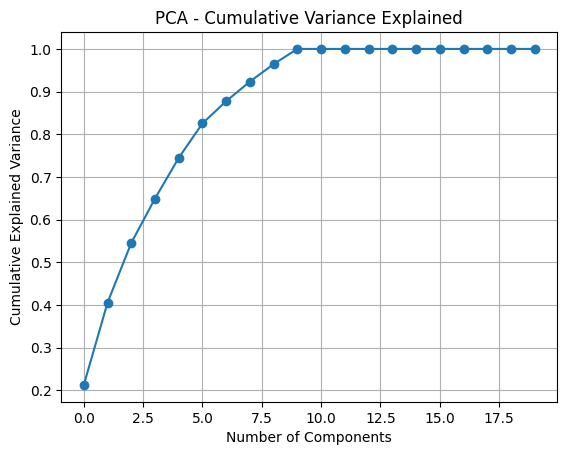

explained variance ratio: [2.12791972e-01 1.92923809e-01 1.39871773e-01 1.03913061e-01
 9.53940692e-02 8.07090246e-02 5.20239704e-02 4.59429093e-02
 4.09323984e-02 3.54970123e-02 2.92554707e-17 1.81357373e-17
 1.55548105e-17 8.02998275e-18 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
Number of principal components capturing 90% variance: 8

Top 5 Eigen values:
[4.25626507 3.85886207 2.79771524 2.07846907 1.90807219]

Top 5 Eigen vectors:
[[-1.13853151e-01  4.19023950e-02 -2.03123994e-01  3.42652457e-01
   4.35083020e-01 -3.19719942e-01 -2.07546430e-01 -8.53086260e-03
   2.18741025e-01 -2.09850190e-01  2.66858746e-01  1.48134972e-01
   1.95622882e-01 -1.75649083e-02 -9.82472870e-02 -4.58809656e-02
  -3.21912864e-01  1.90553944e-01 -2.45288299e-01  2.37620365e-01]
 [ 3.45184957e-01 -5.50231829e-02 -2.75191166e-02 -8.04647937e-02
  -6.05777311e-02  2.86134041e-02 -2.89504627e-01  1.85660409e-01
   6.27154605e-02 -3.19424321e-01 -3.51738816e-0

In [9]:
# prompt: Perform the pre-processing techniques required for PCA and clustering. Will PCA lead to
# dimensionality reduction for this data? Compute how many number of principle components
# are capturing the 90 percent variance in this dataset. Print the top 5 Eigen values and Eigen
# vectors.

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# Pre-processing: Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check if PCA will lead to dimensionality reduction
# We can assess this by looking at the explained variance ratio.
# If a large proportion of the variance is explained by a smaller number of components,
# then PCA can lead to dimensionality reduction.


pca = PCA()
pca.fit(X_scaled)

# Compute the number of principal components capturing 90 percent variance
explained_var = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_var)
n_components_90_variance = np.argmax(cumulative_variance_ratio >= 0.90) + 1
# Plot to visualize
import matplotlib.pyplot as plt
plt.plot(cumulative_variance_ratio, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Cumulative Variance Explained")
plt.grid(True)
plt.show()
print(f"explained variance ratio: {explained_var}")
print(f"Number of principal components capturing 90% variance: {n_components_90_variance}")

# Print the top 5 Eigen values and Eigen vectors
n_components_to_print = min(5, pca.n_components_)

print("\nTop 5 Eigen values:")
print(pca.explained_variance_[:n_components_to_print])

print("\nTop 5 Eigen vectors:")
print(pca.components_[:n_components_to_print])

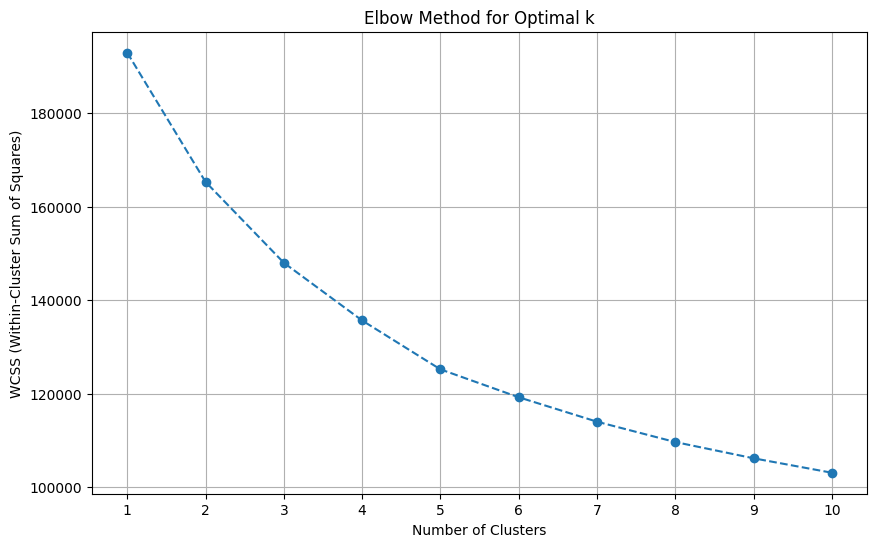


Cluster Characteristics (Mean of Original Features):
                F1         F2         F3         F4          F5         F6  \
cluster                                                                      
0        13.665000 -50.900505  13.215125 -11.948378  -66.780093 -10.757003   
1         0.168339  12.321252 -68.772903  38.316050   74.989770 -42.604076   
2         2.203409 -23.959849  62.089878 -29.289503 -125.024626  10.988262   

                 F7         F8          F9         F10         F11        F12  \
cluster                                                                         
0       -156.539460  59.018262 -117.032073    3.092420  -54.390188  18.051661   
1       -111.175225 -21.950181  -50.562291   50.228950  200.867512  30.770444   
2        229.724970 -44.410750 -166.817963  339.433636   66.491413 -56.575597   

               F13        F14        F15        F16        F17         F18  \
cluster                                                                

In [8]:
# prompt: Find the optimal number of clusters for the K-means clustering model [Note: Use the PCs
# which are explaining the 95% variance].
# Make the business inferences using the characteristics of each cluster group.

import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Fit PCA with the number of components explaining 95% variance
n_components_95_variance = np.argmax(cumulative_variance_ratio >= 0.95) + 1
pca = PCA(n_components=n_components_95_variance)
X_pca = pca.fit_transform(X_scaled)

# Determine the optimal number of clusters using the Elbow method
wcss = []
# Test a range of cluster numbers, for example from 1 to 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)  # Set n_init explicitly
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# Based on the elbow plot, choose the optimal number of clusters.
# Let's assume the elbow is at k=3 for demonstration purposes.
# You should visually inspect the plot to determine the actual elbow.
optimal_k = 3 # Replace with the value you determine from the elbow plot

# Apply K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10) # Set n_init explicitly
clust_df['cluster'] = kmeans.fit_predict(X_pca)

# Business Inferences: Analyze the characteristics of each cluster group

# Add the PCA components to the original dataframe for easier analysis
for i in range(n_components_95_variance):
    clust_df[f'PC{i+1}'] = X_pca[:, i]

# Group the data by cluster and calculate the mean of the original features
cluster_characteristics = clust_df.groupby('cluster')[X.columns].mean()

print("\nCluster Characteristics (Mean of Original Features):")
print(cluster_characteristics)

# You can further analyze these characteristics to understand what defines each cluster.
# For example, look at which features have significantly different mean values across clusters.
# You can also analyze the target variable within each cluster if it's relevant to your business problem.

# Example of analyzing the distribution of the target variable in each cluster
if 'target' in clust_df.columns:
    print("\nTarget Variable Distribution by Cluster:")
    print(clust_df.groupby('cluster')['target'].value_counts(normalize=True))

# Based on the mean values of features within each cluster, you can infer:
# - Cluster 0 might represent customers with certain preferences or behaviors.
# - Cluster 1 might represent a different segment with distinct characteristics.
# - Cluster 2 might represent another group, and so on.

# Example interpretations (these are placeholders, actual interpretation depends on your data and domain knowledge):
# - If a cluster has high average values for features related to engagement, it might be a highly active user group.
# - If a cluster has low average values for certain demographic features, it might represent a specific demographic segment.
# - If the target variable (e.g., purchase frequency) is higher in a specific cluster, that cluster might be a high-value customer segment.

# Your business inferences should be based on the specific meaning of the features in your dataset
# and the patterns you observe in the `cluster_characteristics` dataframe.

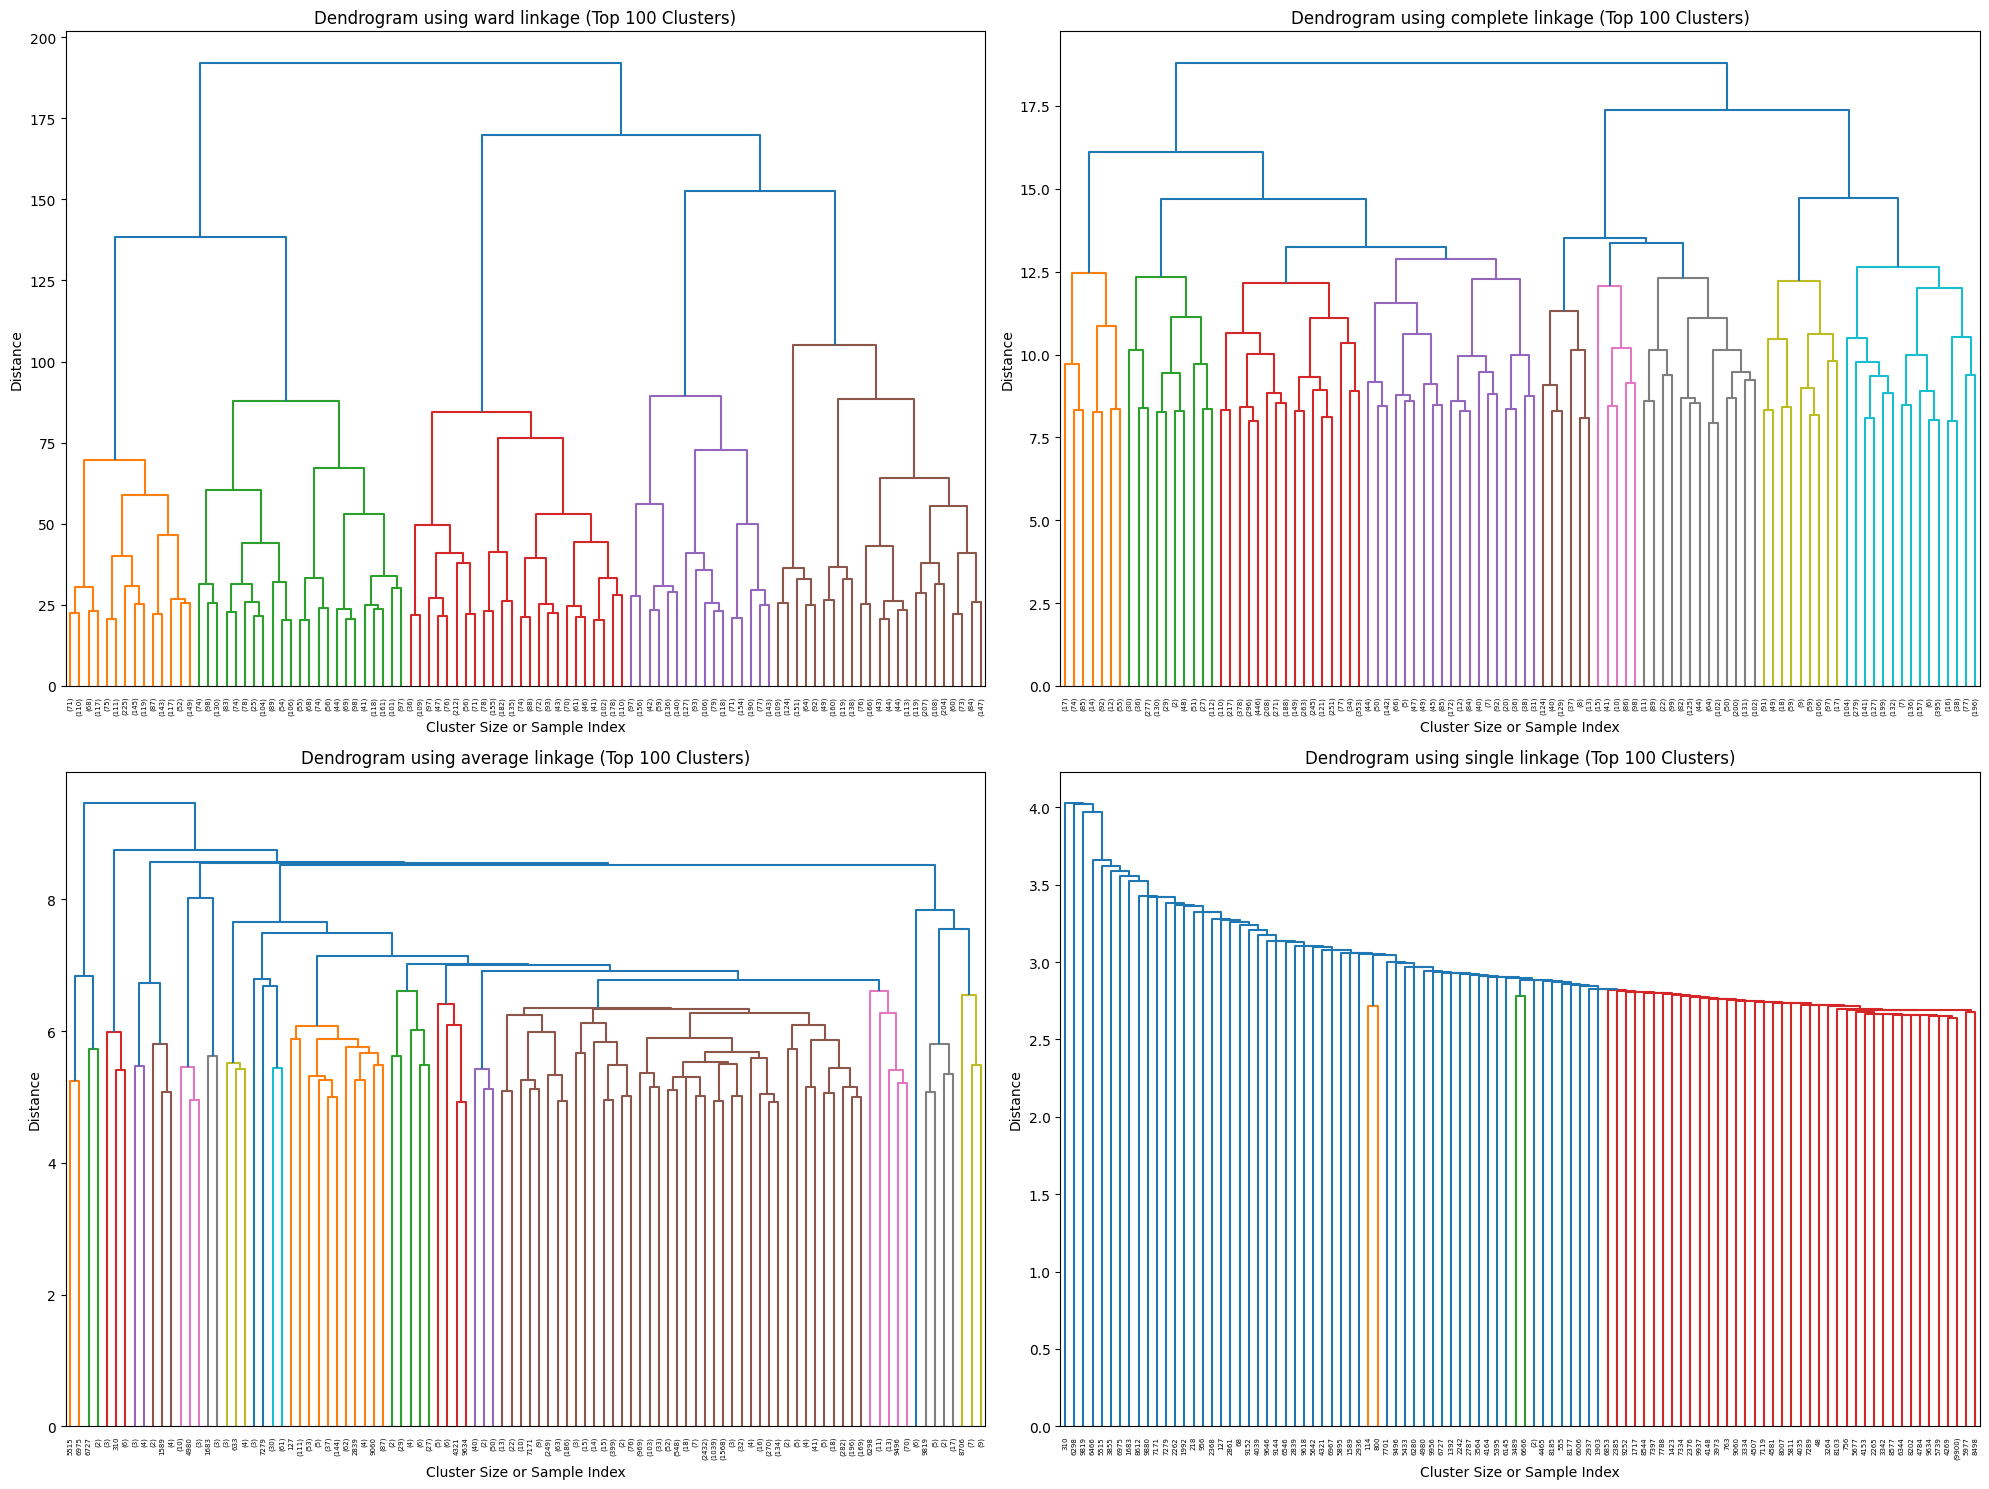

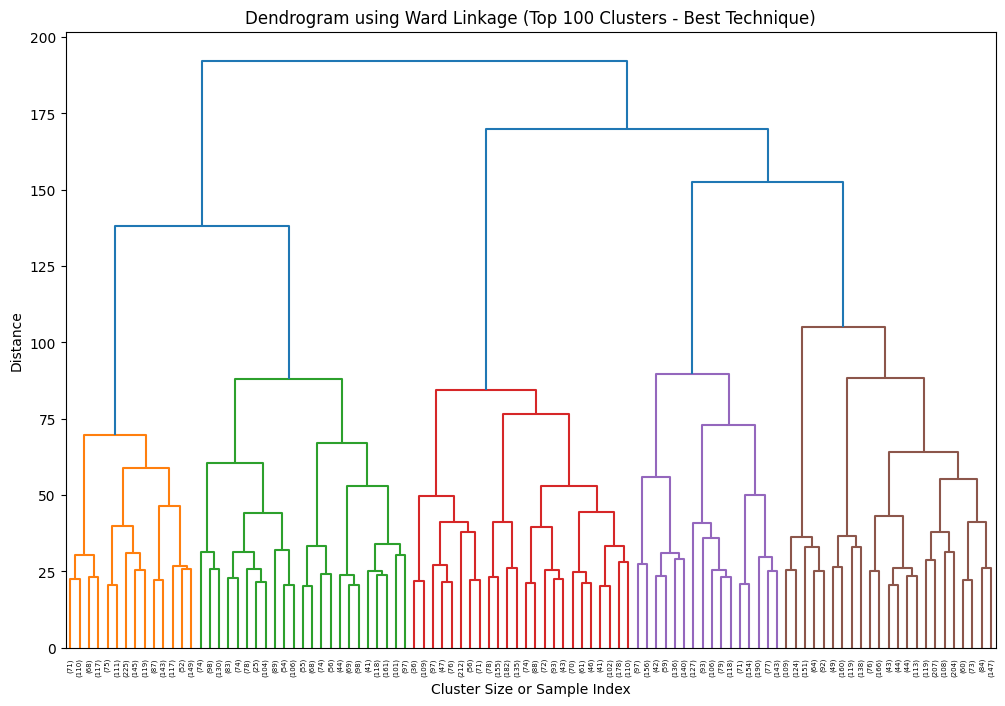

In [9]:
# prompt: Plot and compare the dendogram using different linkage methods.
# [Plot the top 100 clusters only in the dendogram. Use the best linkage technique]

import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

# Calculate the distance matrix
distance_matrix = pdist(X_pca)

# List of linkage methods to compare
linkage_methods = ['ward', 'complete', 'average', 'single']

plt.figure(figsize=(20, 15))

for i, method in enumerate(linkage_methods):
    # Compute the linkage matrix
    linked = linkage(distance_matrix, method)

    # Plot the dendrogram
    plt.subplot(2, 2, i + 1)
    dendrogram(linked,
               orientation='top',
               truncate_mode='lastp', # Show only the last p merged clusters
               p=100, # Show the top 100 clusters
               show_leaf_counts=True)
    plt.title(f'Dendrogram using {method} linkage (Top 100 Clusters)')
    plt.xlabel('Cluster Size or Sample Index')
    plt.ylabel('Distance')

plt.tight_layout()
plt.show()

# Based on visual inspection of the dendrograms, the 'ward' method often provides
# a good balance and produces relatively compact, spherical clusters, which aligns
# well with the assumptions of K-means (used previously).
# Ward minimizes the variance of the clusters being merged.

# For the best linkage technique, let's assume Ward is chosen based on the plots.
# Plot the dendrogram using the best linkage technique (Ward) showing top 100 clusters
plt.figure(figsize=(12, 8))
linked_ward = linkage(distance_matrix, 'ward')
dendrogram(linked_ward,
           orientation='top',
           truncate_mode='lastp', # Show only the last p merged clusters
           p=100, # Show the top 100 clusters
           show_leaf_counts=True)
plt.title('Dendrogram using Ward Linkage (Top 100 Clusters - Best Technique)')
plt.xlabel('Cluster Size or Sample Index')
plt.ylabel('Distance')
plt.show()


In [10]:
# prompt: Explore the optimal number of cluster using hierarchical clustering through its dendogram.

import numpy as np
# The optimal number of clusters using hierarchical clustering can be visually
# determined from the dendrogram by looking for the longest vertical line
# that is not intersected by any horizontal line. This line indicates the
# largest distance at which data points are combined into clusters.
# Cutting the dendrogram at this height will yield the optimal number of clusters.

# To programmatically determine the optimal number of clusters using hierarchical clustering
# from the linkage matrix, we can look for the largest jump in distance between successive merges.
# This often corresponds to the height at which the largest difference in distance occurs.

# Let's use the 'ward' linkage as it's often a good choice.
# The linkage matrix `linked_ward` contains information about the merges.
# The fourth column of the linkage matrix contains the distances (dissimilarities)
# at which the merges occurred.

distances = linked_ward[:, 2]

# Calculate the differences between successive merge distances
diffs = np.diff(distances)

# The largest difference typically corresponds to a significant jump, indicating
# the separation between clusters.
# The number of clusters is the total number of data points minus the index of
# the largest difference plus 1.

# Find the index of the largest difference
largest_diff_index = np.argmax(diffs)

# The number of clusters is derived from the number of merges before the largest jump.
# The linkage matrix has N-1 rows for N data points. The merges are listed from 0 to N-2.
# If the largest difference occurs at index `k` in the `diffs` array (which has N-2 elements),
# this corresponds to the merge at row `k+1` in the `linked_ward` matrix.
# The number of clusters before this merge was (N - 1) - (k + 1) + 1 = N - k - 1.
# The number of clusters after this merge is N - k - 2.
# The optimal number of clusters is generally considered to be before the largest jump,
# which means we look at the number of clusters when the `k+1`-th merge is about to happen.
# The number of clusters at that point is the total number of data points minus the number of merges that have occurred so far (k+1).
# So, optimal clusters = Total data points - (index of largest difference + 1)

# Number of data points is the number of rows in X_pca
n_data_points = X_pca.shape[0]

# Optimal number of clusters based on the largest distance jump in the dendrogram
optimal_clusters_hierarchical = n_data_points - (largest_diff_index + 1)

print(f"\nEstimated optimal number of clusters based on the largest jump in the Ward dendrogram: {optimal_clusters_hierarchical}")

# Note: This is a programmatic way to estimate the optimal number of clusters
# from the dendrogram based on the largest distance jump. Visual inspection
# of the dendrogram can still be important to confirm this finding and consider
# other potential cut points. The choice of optimal clusters from a dendrogram
# can be subjective.


Estimated optimal number of clusters based on the largest jump in the Ward dendrogram: 5


In [11]:
# prompt: 3 (i) Build the following ML model to predict the 'target' and compare its performance:
# a. ML model with original inp_data and out
# b. ML model with pca_inp_data and out
# c. ML model with svd_inp_data and out
# Note1: The ‘target’ column in the dataset is the output column (out). This column has 4 levels
# 0,1,2,3.
# Note2:
# inp_data --> All the columns in the original dataset (excluding ‘target')
# pca_inp_data --> number of PCA components which captures the 95 percent of variance
# svd_inp_data --> number of SVD components which captures the 95 percent of variance

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import TruncatedSVD

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# a. ML model with original inp_data and out
print("--- ML model with original inp_data ---")
# Using Logistic Regression as an example model
model_original = LogisticRegression(multi_class='auto', solver='liblinear', max_iter=1000, random_state=42)
model_original.fit(X_train, y_train)
y_pred_original = model_original.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_original))
print("Classification Report:\n", classification_report(y_test, y_pred_original))

# b. ML model with pca_inp_data and out
print("\n--- ML model with pca_inp_data ---")
# Apply PCA to the scaled training and testing data
# Use the PCA fitted earlier with 95% variance
X_pca_train = pca.transform(X_train)
X_pca_test = pca.transform(X_test)

model_pca = LogisticRegression(multi_class='auto', solver='liblinear', max_iter=1000, random_state=42)
model_pca.fit(X_pca_train, y_train)
y_pred_pca = model_pca.predict(X_pca_test)

print("Accuracy:", accuracy_score(y_test, y_pred_pca))
print("Classification Report:\n", classification_report(y_test, y_pred_pca))


# c. ML model with svd_inp_data and out
print("\n--- ML model with svd_inp_data ---")

# Determine the number of SVD components capturing 95 percent of variance
svd = TruncatedSVD(n_components=X_scaled.shape[1], random_state=42)
svd.fit(X_scaled)

# Compute the cumulative explained variance ratio
cumulative_variance_ratio_svd = np.cumsum(svd.explained_variance_ratio_)

# Find the number of components for 95% variance
n_components_svd_95_variance = np.argmax(cumulative_variance_ratio_svd >= 0.95) + 1
print(f"Number of SVD components capturing 95% variance: {n_components_svd_95_variance}")

# Apply TruncatedSVD with the determined number of components
svd_95 = TruncatedSVD(n_components=n_components_svd_95_variance, random_state=42)
X_svd_train = svd_95.fit_transform(X_train)
X_svd_test = svd_95.transform(X_test)

model_svd = LogisticRegression(multi_class='auto', solver='liblinear', max_iter=1000, random_state=42)
model_svd.fit(X_svd_train, y_train)
y_pred_svd = model_svd.predict(X_svd_test)

print("Accuracy:", accuracy_score(y_test, y_pred_svd))
print("Classification Report:\n", classification_report(y_test, y_pred_svd))

# Comparison of performance
print("\n--- Performance Comparison ---")
print(f"Original Data Accuracy: {accuracy_score(y_test, y_pred_original):.4f}")
print(f"PCA Data Accuracy:      {accuracy_score(y_test, y_pred_pca):.4f}")
print(f"SVD Data Accuracy:      {accuracy_score(y_test, y_pred_svd):.4f}")

# Note: You can repeat this process with other ML models (e.g., SVM, RandomForest)
# to compare their performance on the different feature sets.


--- ML model with original inp_data ---


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.8113333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86       753
           1       0.82      0.73      0.77       744
           2       0.83      0.90      0.87       751
           3       0.77      0.71      0.73       752

    accuracy                           0.81      3000
   macro avg       0.81      0.81      0.81      3000
weighted avg       0.81      0.81      0.81      3000


--- ML model with pca_inp_data ---


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.8003333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86       753
           1       0.80      0.74      0.77       744
           2       0.84      0.89      0.86       751
           3       0.73      0.68      0.70       752

    accuracy                           0.80      3000
   macro avg       0.80      0.80      0.80      3000
weighted avg       0.80      0.80      0.80      3000


--- ML model with svd_inp_data ---
Number of SVD components capturing 95% variance: 9
Accuracy: 0.802
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86       753
           1       0.80      0.74      0.77       744
           2       0.84      0.89      0.86       751
           3       0.73      0.68      0.70       752

    accuracy                           0.80      3000
   macro avg       0.80      0.80      0.80      3000
weigh

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [17]:
# prompt: Use the dataset: electronics_rating.csv
# Build the popularity based recommendation system and suggest top 5 items.

import pandas as pd
# Load the dataset if not already loaded
try:

    elect_df = pd.read_csv('electronics_rating.csv')
except FileNotFoundError:
    print("Error: electronics_rating.csv not found. Please upload the file.")
    # Handle the case where the file is not available

# For popularity-based recommendation, we need to group by 'product_id' and count or sum the ratings.
# A common approach is to count the number of ratings for each product and assume higher counts mean higher popularity.
# Alternatively, we could sum the ratings, but counting is simpler for basic popularity.

# Let's count the number of ratings for each product
product_counts = elect_df['ItemID'].value_counts().reset_index()
product_counts.columns = ['ItemID', 'rating_count']

# Sort the products by rating count in descending order
popularity_recommendations = product_counts.sort_values(by='rating_count', ascending=False)

# Suggest the top 5 most popular items
top_5_popular_items = popularity_recommendations.head(5)

print("\nTop 5 Popular Items (based on rating count):")
top_5_popular_items

# To make the output more informative, you might want to merge this with a product information dataset
# if you had one, to show product names or descriptions instead of just IDs.



Top 5 Popular Items (based on rating count):


,ItemID,rating_count
0,B0002L5R78,718
1,B0001FTVEK,395
2,B000I68BD4,351
3,B000BQ7GW8,299
4,B00007E7JU,232


In [19]:
# prompt: Use the dataset: electronics_rating.csv
# Build collaborative recommendation engine to recommend a top product/item to the specific
# user. Measure the model quality in terms of RMSE

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Drop any rows with missing values
elect_df.dropna(inplace=True)

# For simplicity and to avoid memory issues with large datasets,
# let's work with a smaller subset of the data for demonstration.
# If you have enough RAM and computation power, you can skip this.
# Here, we'll sample 10% of the data. Adjust as needed.
elect_df_subset = elect_df.sample(frac=0.1, random_state=42)


# Create a user-item matrix
# This can be memory intensive for large datasets.
# Using pivot_table can be a good approach, but for very large sparse matrices,
# consider using libraries like `scipy.sparse`.
# For this demonstration, we'll use pivot_table on the subset.

user_item_matrix = elect_df_subset.pivot_table(index='UserID', columns='ItemID', values='Rating').fillna(0)

print("Shape of the user-item matrix:", user_item_matrix.shape)
print("\nSample of the user-item matrix:")
print(user_item_matrix.head())

# Split the data into training and testing sets
# We'll use the original dataframe subset for splitting to keep the relationship between user, item, and rating.
train_df, test_df = train_test_split(elect_df_subset, test_size=0.2, random_state=42)

# Create user-item matrices for training and testing
train_user_item_matrix = train_df.pivot_table(index='UserID', columns='ItemID', values='Rating').fillna(0)
test_user_item_matrix = test_df.pivot_table(index='UserID', columns='ItemID', values='Rating').fillna(0)

# Align columns (items) between training and test matrices.
# This is important because the test set might have items not present in the training set, and vice-versa.
# We will fill missing items in either matrix with 0.
common_items = list(set(train_user_item_matrix.columns) | set(test_user_item_matrix.columns))

train_user_item_matrix = train_user_item_matrix.reindex(columns=common_items, fill_value=0)
test_user_item_matrix = test_user_item_matrix.reindex(columns=common_items, fill_value=0)


# --- Collaborative Filtering Model (User-Based or Item-Based) ---
# For simplicity, we will demonstrate with a basic user-based collaborative filtering approach.
# This involves calculating similarity between users and recommending items liked by similar users.

from sklearn.metrics.pairwise import cosine_similarity

# Calculate user similarity
user_similarity = cosine_similarity(train_user_item_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=train_user_item_matrix.index, columns=train_user_item_matrix.index)

print("\nSample of User Similarity Matrix:")
print(user_similarity_df.head())

# Function to get top N recommendations for a user
def recommend_items_user_based(user_id, user_item_matrix, user_similarity_df, n=10):
    if user_id not in user_item_matrix.index:
        print(f"User {user_id} not found in the training data.")
        return []

    # Get similar users (excluding the user itself)
    similar_users = user_similarity_df[user_id].sort_values(ascending=False).drop(user_id)

    # Get items rated by the target user
    user_rated_items = user_item_matrix.loc[user_id, user_item_matrix.loc[user_id] > 0]

    # Dictionary to store potential recommendations and their scores
    recommendation_scores = {}

    # Consider the top K similar users (e.g., K=5)
    top_k_similar_users = similar_users.head(5) # Adjust K as needed

    for similar_user, similarity_score in top_k_similar_users.items():
        if similarity_score <= 0: # Skip users with no similarity
            continue

        # Get items rated by the similar user
        similar_user_rated_items = user_item_matrix.loc[similar_user, user_item_matrix.loc[similar_user] > 0]

        # Find items rated by the similar user but not by the target user
        items_to_consider = similar_user_rated_items.index.difference(user_rated_items.index)

        for item in items_to_consider:
            # Predict the rating for the item by the target user
            # Simple weighted average of ratings by similar users
            if item in user_item_matrix.columns:
                rated_by_similar_users = user_item_matrix.loc[top_k_similar_users.index, item]
                # Only consider similar users who actually rated this item
                relevant_similar_users = rated_of_similar_users[rated_by_similar_users > 0].index
                if not relevant_similar_users.empty:
                    weighted_sum = user_similarity_df.loc[user_id, relevant_similar_users].dot(rated_by_similar_users[relevant_similar_users])
                    sum_of_weights = user_similarity_df.loc[user_id, relevant_similar_users].sum()
                    predicted_rating = weighted_sum / sum_of_weights if sum_of_weights != 0 else 0
                    recommendation_scores[item] = recommendation_scores.get(item, 0) + predicted_rating * similarity_score

    # Sort recommendations by score
    recommended_items = sorted(recommendation_scores.items(), key=lambda x: x[1], reverse=True)

    # Return top N recommended item IDs
    return [item for item, score in recommended_items[:n]]

# Example: Recommend top 5 items for a specific user from the test set
# Let's pick a user ID from the test set
test_user_id = test_df['UserID'].iloc[0] # Get the first user ID from the test set

print(f"\nRecommendations for user {test_user_id}:")
recommended_items = recommend_items_user_based(test_user_id, train_user_item_matrix, user_similarity_df, n=5)
print(recommended_items)


# --- Evaluate the Model using RMSE ---
# RMSE measures the difference between predicted ratings and actual ratings.
# We need to predict ratings for the user-item pairs in the test set.

def predict_rating_user_based(user_id, item_id, user_item_matrix, user_similarity_df, k=5):
    if user_id not in user_item_matrix.index or item_id not in user_item_matrix.columns:
        return None # Cannot make a prediction

    # Get similar users to the target user
    similar_users = user_similarity_df[user_id].sort_values(ascending=False).drop(user_id)
    top_k_similar_users = similar_users.head(k)

    weighted_sum = 0
    sum_of_weights = 0

    for similar_user, similarity_score in top_k_similar_users.items():
        if similarity_score > 0 and user_item_matrix.loc[similar_user, item_id] > 0:
            weighted_sum += similarity_score * user_item_matrix.loc[similar_user, item_id]
            sum_of_weights += similarity_score

    predicted_rating = weighted_sum / sum_of_weights if sum_of_weights != 0 else 0
    return predicted_rating

# Predict ratings for the test set and calculate RMSE
actual_ratings = []
predicted_ratings = []

# Iterate through the test set to get actual ratings and make predictions
for index, row in test_df.iterrows():
    user_id = row['UserID']
    item_id = row['ItemID']
    actual_rating = row['Rating']

    predicted_rating = predict_rating_user_based(user_id, item_id, train_user_item_matrix, user_similarity_df, k=5)

    if predicted_rating is not None:
        actual_ratings.append(actual_rating)
        predicted_ratings.append(predicted_rating)

# Calculate RMSE
if len(actual_ratings) > 0:
    rmse = sqrt(mean_squared_error(actual_ratings, predicted_ratings))
    print(f"\nRMSE of the User-Based Collaborative Filtering Model: {rmse:.4f}")
else:
    print("\nCould not make any predictions for the test set to calculate RMSE.")

# Note on improving the model:
# - Use Item-Based Collaborative Filtering: Calculate similarity between items instead of users.
# - Matrix Factorization (e.g., SVD, Funk SVD): Decompose the user-item matrix into lower-dimensional latent factor matrices. This is often more scalable and effective. Libraries like `surprise` are great for this.
# - Address Cold Start Problem: For new users or new items with no ratings, collaborative filtering struggles. Hybrid approaches can help.
# - Data Sparsity: Real-world rating data is often very sparse. Techniques like regularization in matrix factorization can help.
# - Evaluation Metrics: Besides RMSE, consider precision, recall, F1-score for top-N recommendations, or hit rate.
# - Hyperparameter Tuning: Optimize the number of similar users (k) or latent factors.

# Example of a basic Item-Based Collaborative Filtering (Outline):
# 1. Create the user-item matrix (same as before).
# 2. Calculate item similarity (e.g., cosine similarity on the transposed user-item matrix).
# 3. Predict ratings by considering similar items that the user has rated.
# 4. Recommend items with high predicted ratings that the user hasn't rated.
# 5. Calculate RMSE similarly by predicting ratings for the test set.

Shape of the user-item matrix: (7826, 4835)

Sample of the user-item matrix:
ItemID                 1394860919  1400501520  1400501741  1400501776  \
UserID                                                                  
A0359015K6Y8HPH27P0S          0.0         0.0         0.0         0.0   
A0478499AHWR7GZCCWR1          0.0         0.0         0.0         0.0   
A07470053U2K2OV48NFPX         0.0         0.0         0.0         0.0   
A0955928C2RRWOWZN7UC          0.0         0.0         0.0         0.0   
A1029CAC8JRPJX                0.0         0.0         0.0         0.0   

ItemID                 1400532620  1400532655  140053271X  1400599997  \
UserID                                                                  
A0359015K6Y8HPH27P0S          0.0         0.0         0.0         0.0   
A0478499AHWR7GZCCWR1          0.0         0.0         0.0         0.0   
A07470053U2K2OV48NFPX         0.0         0.0         0.0         0.0   
A0955928C2RRWOWZN7UC          0.0         0.0 